<a href="https://colab.research.google.com/github/SiddheshDaphane/Deep_Learning_With_PyTorch/blob/master/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision
****

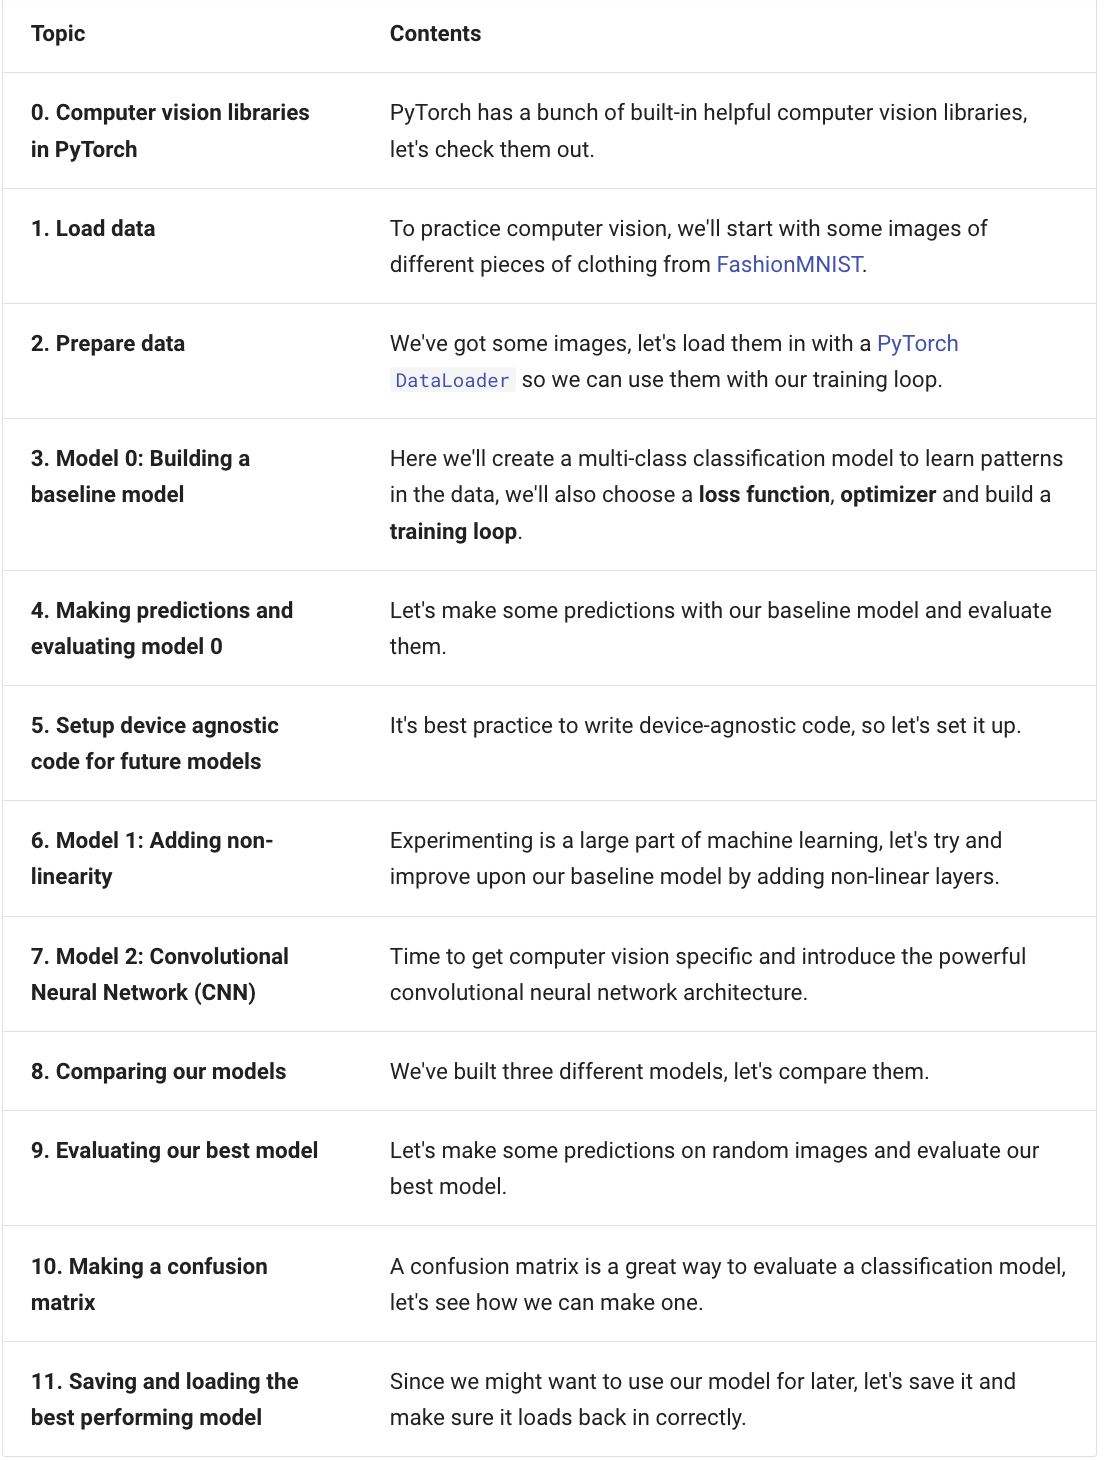

## 0. Computer vsision libraries in PyTorch
****

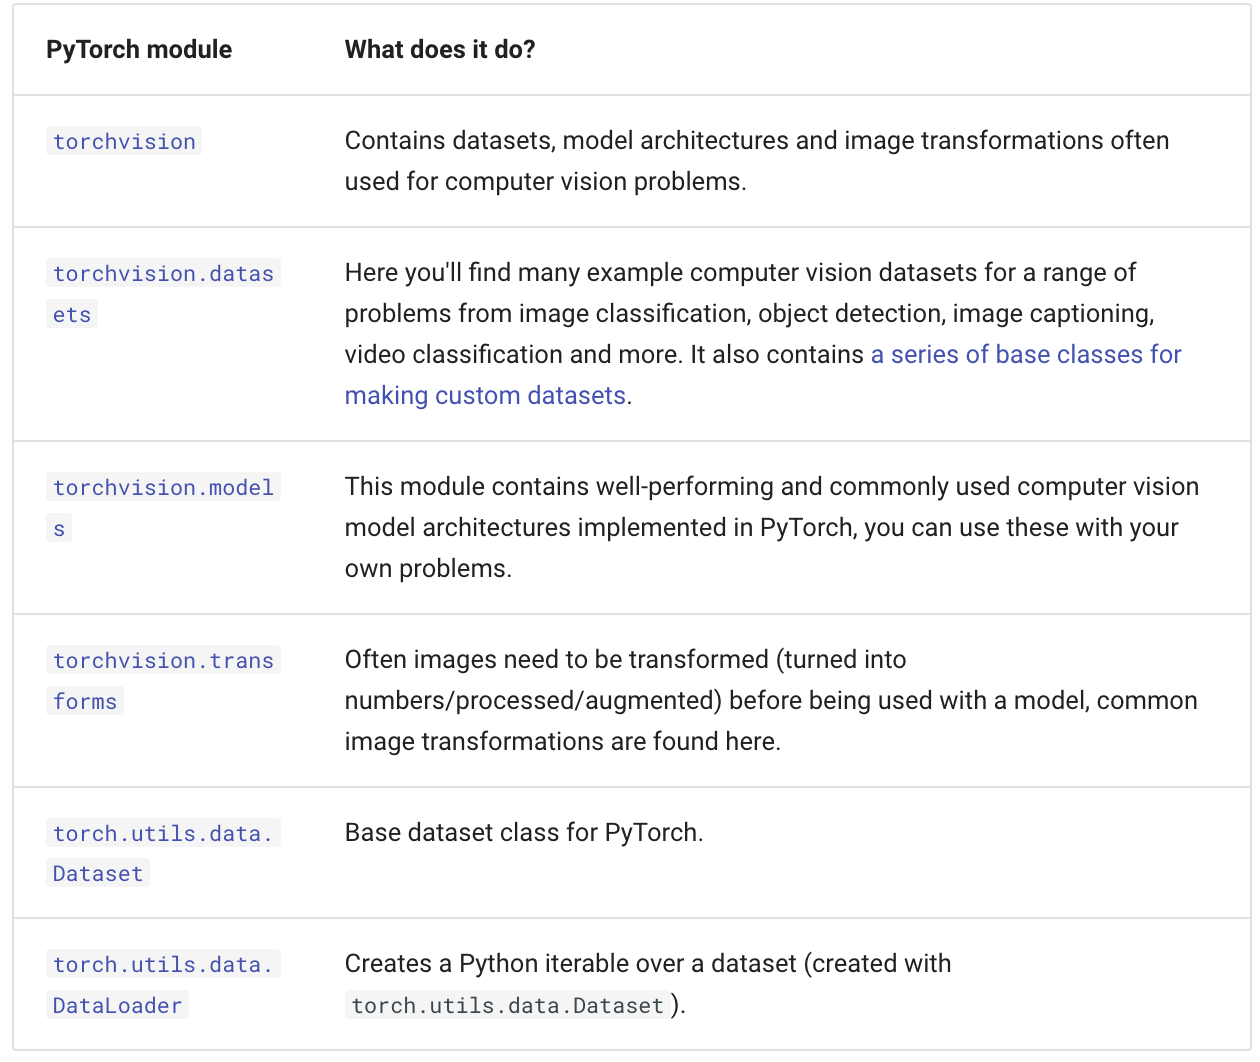

In [23]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import matplotlib
import matplotlib.pyplot as plt

print(f"PyTorch Version: {torch.__version__}")
print(f"\ntorchvision Version: {torchvision.__version__}")

PyTorch Version: 2.5.1+cu121

torchvision Version: 0.20.1+cu121


## 1. Getting a dataset
****
We are going to start with FashionMNIST.

To download it, we provide the following parameters:

* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.


In [24]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [29]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

## 1.1 Input and output shapes of a computer vision model

In [36]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [37]:
label.shape # label is of int datatype. No shape

AttributeError: 'int' object has no attribute 'shape'

**shape of image is [1,28,28] -> [color_channels=1, height=28, width=28]**

Having `color_channels=1` means the image is grayscale

if `color_channels=3`, the iamge comes in pixel values of red, green and blue.

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

PyTorch generally accepts `NCHW` (channels first) as default for many operators. `N` is batch size.

In [33]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [34]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

This means our problem is **multi-class classification**

In [38]:
image.shape

torch.Size([1, 28, 28])

Image shape: torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

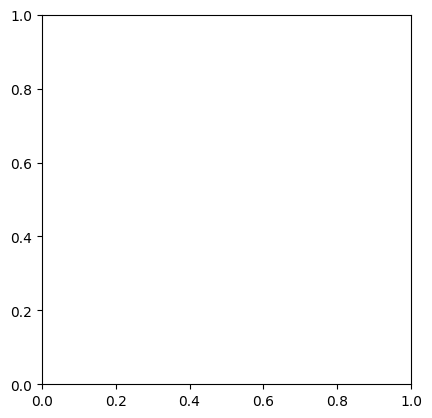

In [39]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image) # We need to remove the color-channel from it to plot it.

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

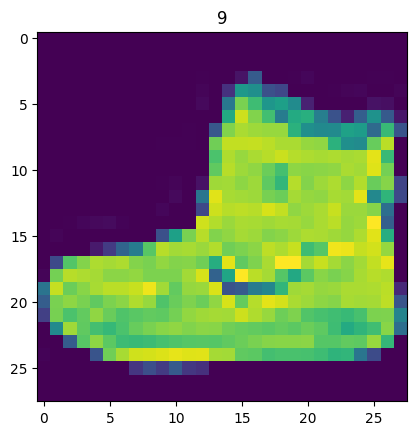

In [40]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)  # 9 is label.

Text(0.5, 1.0, 'Ankle boot')

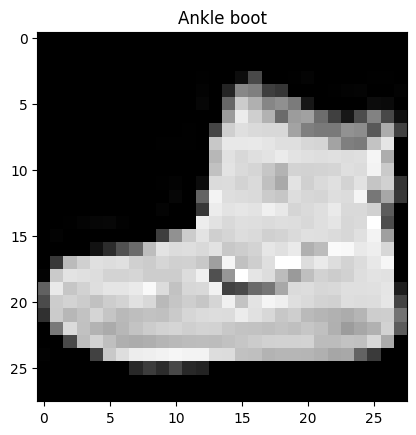

In [41]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])

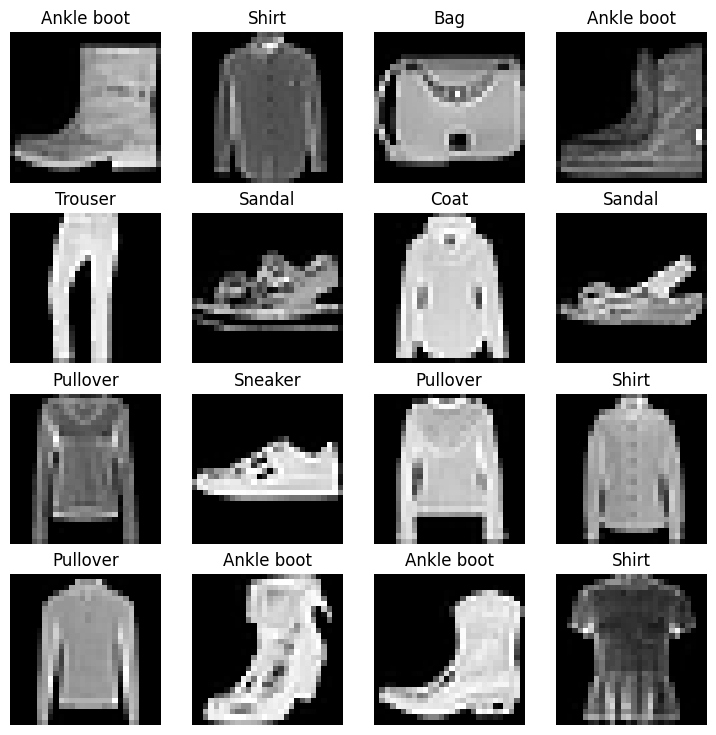

In [52]:
# plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

The for Loop
The loop iterates
4×4=16 times to plot 16 random images from the `train_data` dataset.

4.1. `random_idx = torch.randint(0, len(train_data), size=[1]).item()`
Let’s break this down:

* `torch.randint(0, len(train_data), size=[1])`:

  * Generates a random integer between `0` (inclusive) and `len(train_data)` (exclusive).
  * `size=[1]`: Specifies that we want a single random integer (stored in a 1-element tensor).
* `.item()`:

  * Extracts the single value from the 1-element tensor and returns it as a standard Python scalar (integer, in this case).
  * PyTorch tensors store values in a tensor object, even if there’s just one value. `.item()` converts it to a native Python data type.

**Why Use `.item()`**?
* To simplify the output from a PyTorch tensor (e.g., `tensor(42)`) to a Python scalar `(42)`.
* This makes it easier to use the value for indexing or display purposes.


In [51]:
# plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

## 2. Prepare DataLoader
****
The next step is to prepare it with a `torch.utils.data.DataLoader` or `DataLoader` for short.

The `DataLoader` helps load data into a model.

It turns a large `Dataset` into a python iterable of smaller chunks.

These smaller chunks are called `batches` or `mini-batches` abd cab ve set by the `batch-size` parameter.

**why do this?**

Because it's more computationally efficient. In ideal world you could do the forward pass and backward pass across all of your data at once. But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches. It also gives your model more opportunity to improve.

With **mini-batches**, gradient descent is performed more often per epoch.

In [53]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True )

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c9bc16ee740>, <torch.utils.data.dataloader.DataLoader object at 0x7c9bc16ee3e0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [54]:
# Check out what's inside the training dataloader
train_features_batch, train_lebels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_lebels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

**Step 1**: `iter(train_dataloader)`
* `iter()` creates an iterator object from the `train_dataloader`.
* An iterator is an object in Python that allows you to iterate over items (e.g., batches in this case) one at a time.
* The `train_dataloader` object is iterable, so you can create an iterator from it using `iter()`.

**Step 2**: `next()`
* `next()` retrieves the next item (batch) from the iterator created by `iter()`.
* In the context of `train_dataloader`, `next()` will fetch the first batch of data when called for the first time.

**Why Use `next(iter())`?**

`next(iter(train_dataloader))` is a quick way to:

1. Grab a single batch of data for inspection (e.g., shapes or contents of images and labels).
2. Useful during debugging to verify data is being loaded and processed correctly.

In [55]:
len(train_features_batch)

32

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


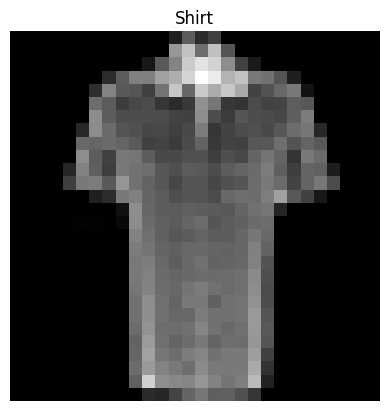

In [58]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_lebels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [59]:
random_idx

6

## 3. Model 0: Build a baseline model
****
Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest model you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated model.

Our baseline will consists of two `nn.Linear()` layers.

We will add `nn.Flatten()` layer. It compresses the dimensions of a tensor into a single vector.

In [62]:
# Create a flatten layer
flatten_mdoel = nn.Flatten() # all nn modules functions as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_mdoel(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, wwidth]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, wwidth]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


**Why do this?**

Because  we've now turned our pixel data from height and width dimensions into one long **feature vector**

In [63]:
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs in vector form
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:

* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [64]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModel(input_shape=784, # One for every pixel (28x28)
                            hidden_units=10, #how many units in the hidden layer
                            output_shape=len(class_names) # one for every class
                            )
model_0.to("cpu")


FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)